# TUGAS 3 - ODI VITO OWEN

## Pemodelan Penggunaan Listrik

In [1]:
import pandas as pd
import numpy as np

dataset= pd.read_csv('AEP_hourly.csv', sep=';', encoding='ISO-8859-1')
dataset

df = pd.DataFrame(dataset)
df

,Datetime,AEP_MW
0,31/12/2004 01:00,13478.0
1,31/12/2004 02:00,12865.0
2,31/12/2004 03:00,12577.0
3,31/12/2004 04:00,12517.0
4,31/12/2004 05:00,12670.0
...,...,...
121268,01/01/2018 20:00,21089.0
121269,01/01/2018 21:00,20999.0
121270,01/01/2018 22:00,20820.0
121271,01/01/2018 23:00,20415.0


## Visualisasi Data 2004-2017

Total energi per tahun (tanpa 2018):
                 AEP_MW
Datetime               
2004-12-31   33479854.0
2005-12-31  138752914.0
2006-12-31  137826610.0
2007-12-31  145781458.0
2008-12-31  145224910.0
2009-12-31  133595510.0
2010-12-31  140187481.0
2011-12-31  138511181.0
2012-12-31  134814172.0
2013-12-31  133105937.0
2014-12-31  132865962.0
2015-12-31  130251762.0
2016-12-31  129864641.0
2017-12-31  126877548.0


C:\Users\72535\AppData\Local\Temp\ipykernel_19236\3301336868.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset['Datetime'] = pd.to_datetime(dataset['Datetime'])
C:\Users\72535\AppData\Local\Temp\ipykernel_19236\3301336868.py:14: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = dataset.resample('Y').sum()


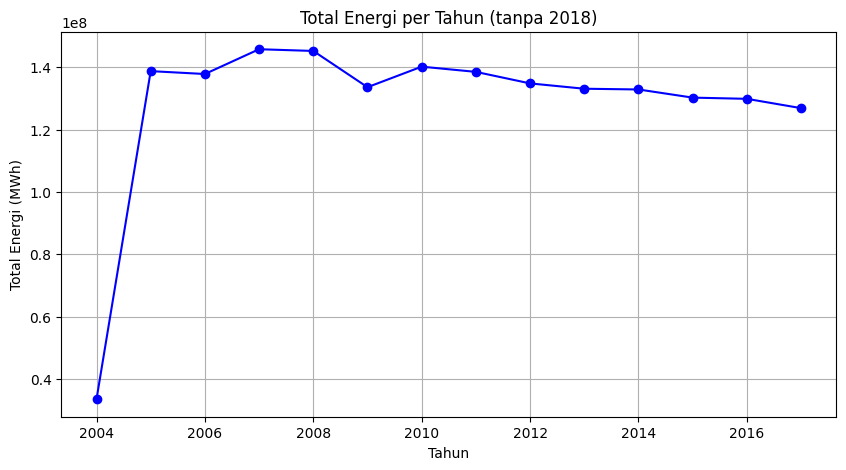

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Baca data ---
dataset = pd.read_csv('AEP_hourly.csv', sep=';', encoding='ISO-8859-1')

# --- Pastikan kolom datetime ---
dataset['Datetime'] = pd.to_datetime(dataset['Datetime'])

# --- Jadikan index datetime ---
dataset.set_index('Datetime', inplace=True)

# --- Resample per tahun dengan jumlah total (sum) ---
df_yearly = dataset.resample('Y').sum()

# --- Hapus tahun 2018 ---
df_yearly = df_yearly[df_yearly.index.year != 2018]

# --- Tampilkan hasil ---
print("Total energi per tahun (tanpa 2018):")
print(df_yearly)

# --- Visualisasi ---
plt.figure(figsize=(10,5))
plt.plot(df_yearly.index.year, df_yearly.values, marker='o', color='blue')
plt.title("Total Energi per Tahun (tanpa 2018)")
plt.xlabel("Tahun")
plt.ylabel("Total Energi (MWh)")
plt.grid(True)
plt.show()


## Slicing Data 2005-2017

C:\Users\72535\AppData\Local\Temp\ipykernel_19236\3953134818.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset['Datetime'] = pd.to_datetime(dataset['Datetime'])


Rata-rata energi per tahun (2005–2017):
                 AEP_MW
Datetime               
2005-12-31  138752914.0
2006-12-31  137826610.0
2007-12-31  145781458.0
2008-12-31  145224910.0
2009-12-31  133595510.0
2010-12-31  140187481.0
2011-12-31  138511181.0
2012-12-31  134814172.0
2013-12-31  133105937.0
2014-12-31  132865962.0
2015-12-31  130251762.0
2016-12-31  129864641.0
2017-12-31  126877548.0


C:\Users\72535\AppData\Local\Temp\ipykernel_19236\3953134818.py:14: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = dataset.resample('Y').sum()


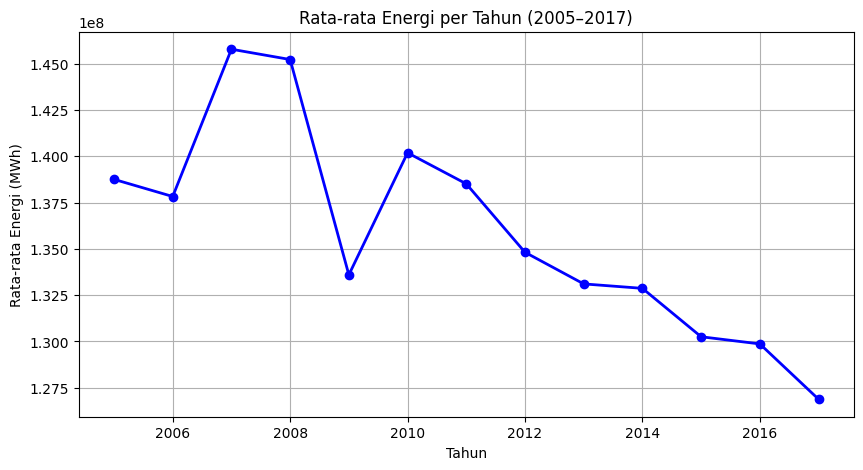

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Baca data ---
dataset = pd.read_csv('AEP_hourly.csv', sep=';', encoding='ISO-8859-1')

# --- Pastikan kolom datetime ---
dataset['Datetime'] = pd.to_datetime(dataset['Datetime'])

# --- Jadikan index datetime ---
dataset.set_index('Datetime', inplace=True)

# --- Resample per tahun dengan rata-rata (mean) ---
df_yearly = dataset.resample('Y').sum()

# --- Ambil hanya tahun 2005 sampai 2017 ---
df_yearly = df_yearly[(df_yearly.index.year >= 2005) & (df_yearly.index.year <= 2017)]

# --- Tampilkan hasil ---
print("Rata-rata energi per tahun (2005–2017):")
print(df_yearly)

# --- Visualisasi ---
plt.figure(figsize=(10,5))
plt.plot(df_yearly.index.year, df_yearly.values, marker='o', color='blue', linewidth=2)
plt.title("Rata-rata Energi per Tahun (2005–2017)")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata Energi (MWh)")
plt.grid(True)
plt.show()


* Slicing data diambil karena data di tahun 2004 itu tidak lengkap dan bisa membuat pemodelan menjadi tidak kredibel.

## Linear Regression

C:\Users\72535\AppData\Local\Temp\ipykernel_19236\4135420944.py:11: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset["Datetime"] = pd.to_datetime(dataset["Datetime"])
C:\Users\72535\AppData\Local\Temp\ipykernel_19236\4135420944.py:17: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = dataset.resample("Y").sum()


Persamaan model: y = -1190165.52 * x + 2,529,396,706.42
Prediksi konsumsi listrik tahun 2018 = 127,642,694 MWh
MAPE (training): 1.86%
RMSE (training): 3,246,427


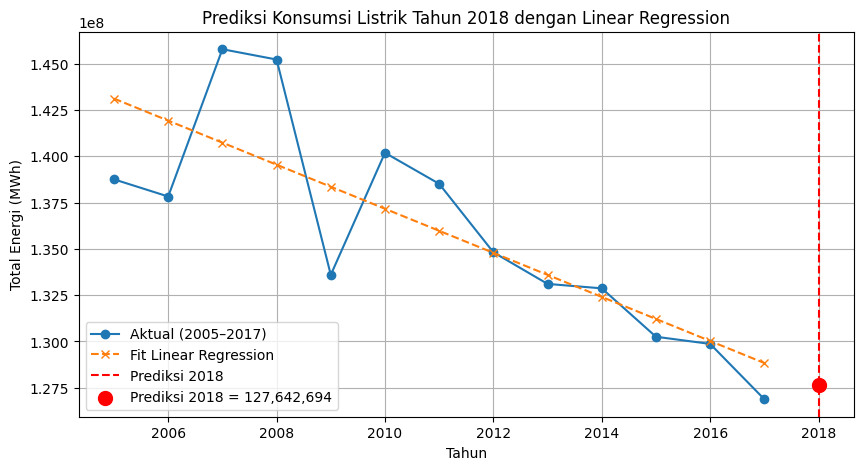

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# =======================
# 1. Load dataset
# =======================
dataset = pd.read_csv("AEP_hourly.csv", sep=";", encoding="ISO-8859-1")
dataset["Datetime"] = pd.to_datetime(dataset["Datetime"])
dataset.set_index("Datetime", inplace=True)

# =======================
# 2. Ambil data per tahun (2005–2017)
# =======================
df_yearly = dataset.resample("Y").sum()
df_yearly = df_yearly[(df_yearly.index.year >= 2005) & (df_yearly.index.year <= 2017)]

X = df_yearly.index.year.values.reshape(-1, 1)  # fitur = tahun
y = df_yearly["AEP_MW"].values                  # target = energi

# =======================
# 3. Model Linear Regression
# =======================
model = LinearRegression()
model.fit(X, y)

# =======================
# 4. Persamaan model
# =======================
a = model.coef_[0]
b = model.intercept_
print(f"Persamaan model: y = {a:.2f} * x + {b:,.2f}")

# =======================
# 5. Prediksi 2018
# =======================
year_pred = np.array([[2018]])
y_pred_2018 = model.predict(year_pred)[0]

print(f"Prediksi konsumsi listrik tahun 2018 = {y_pred_2018:,.0f} MWh")

# =======================
# 6. Evaluasi (di training set 2005–2017)
# =======================
y_train_pred = model.predict(X)
mape = mean_absolute_percentage_error(y, y_train_pred) * 100   # persen
rmse = np.sqrt(mean_squared_error(y, y_train_pred))

print(f"MAPE (training): {mape:.2f}%")
print(f"RMSE (training): {rmse:,.0f}")

# =======================
# 7. Plot hasil
# =======================
plt.figure(figsize=(10,5))
plt.plot(X.flatten(), y, marker="o", label="Aktual (2005–2017)")
plt.plot(X.flatten(), y_train_pred, marker="x", linestyle="--", label="Fit Linear Regression")
plt.axvline(2018, color="red", linestyle="--", label="Prediksi 2018")
plt.scatter(2018, y_pred_2018, color="red", s=100, zorder=5,
            label=f"Prediksi 2018 = {y_pred_2018:,.0f}")

plt.legend()
plt.grid(True)
plt.title("Prediksi Konsumsi Listrik Tahun 2018 dengan Linear Regression")
plt.xlabel("Tahun")
plt.ylabel("Total Energi (MWh)")
plt.show()


## ARIMA

C:\Users\72535\AppData\Local\Temp\ipykernel_19236\3848594382.py:11: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset["Datetime"] = pd.to_datetime(dataset["Datetime"])
C:\Users\72535\AppData\Local\Temp\ipykernel_19236\3848594382.py:17: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = dataset.resample("Y").sum()


                               SARIMAX Results                                
Dep. Variable:                 AEP_MW   No. Observations:                   13
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -206.073
Date:                Tue, 23 Sep 2025   AIC                            418.146
Time:                        07:56:52   BIC                            419.601
Sample:                    12-31-2005   HQIC                           417.608
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3786      0.433     -0.874      0.382      -1.227       0.470
ma.L1          0.3578      0.451      0.794      0.427      -0.526       1.241
sigma2      7.997e+12   2.45e-13   3.26e+25      0.0

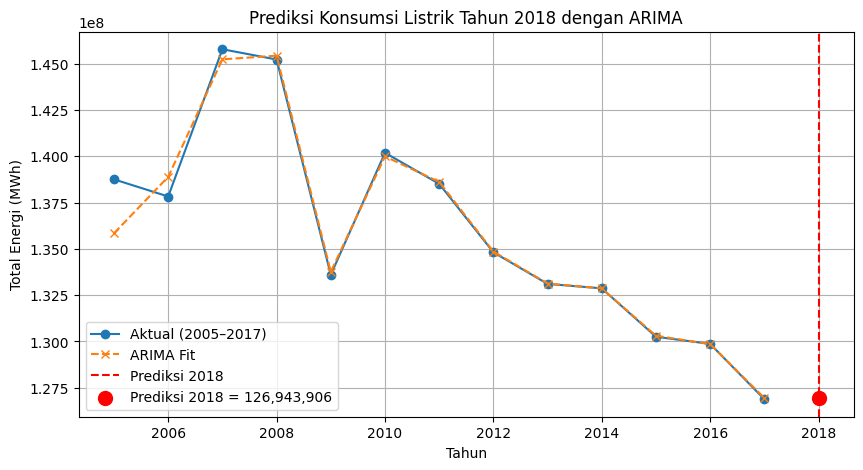

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# =======================
# 1. Load dataset
# =======================
dataset = pd.read_csv("AEP_hourly.csv", sep=";", encoding="ISO-8859-1")
dataset["Datetime"] = pd.to_datetime(dataset["Datetime"])
dataset.set_index("Datetime", inplace=True)

# =======================
# 2. Ambil data per tahun (2005–2017)
# =======================
df_yearly = dataset.resample("Y").sum()
df_yearly = df_yearly[(df_yearly.index.year >= 2005) & (df_yearly.index.year <= 2017)]

y = df_yearly["AEP_MW"]

# =======================
# 3. Fit ARIMA model
# =======================
# (p,d,q) bisa dioptimasi pakai auto_arima, untuk contoh pakai (1,1,1)
model = ARIMA(y, order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())

# =======================
# 4. Prediksi 2018
# =======================
forecast = model_fit.forecast(steps=1)  # langkah 1 tahun ke depan
y_pred_2018 = forecast.iloc[0]

print(f"\nPrediksi konsumsi listrik tahun 2018 = {y_pred_2018:,.0f} MWh")

# =======================
# 5. Evaluasi (in-sample 2005–2017)
# =======================
y_train_pred = model_fit.predict(start=1, end=len(y), dynamic=False)
mape = mean_absolute_percentage_error(y[1:], y_train_pred[1:]) * 100
rmse = np.sqrt(mean_squared_error(y[1:], y_train_pred[1:]))

print(f"MAPE (training): {mape:.2f}%")
print(f"RMSE (training): {rmse:,.0f}")

# =======================
# 6. Plot hasil
# =======================
plt.figure(figsize=(10,5))
plt.plot(y.index.year, y, marker="o", label="Aktual (2005–2017)")
plt.plot(y.index.year, y_train_pred, marker="x", linestyle="--", label="ARIMA Fit")
plt.axvline(2018, color="red", linestyle="--", label="Prediksi 2018")
plt.scatter(2018, y_pred_2018, color="red", s=100, zorder=5,
            label=f"Prediksi 2018 = {y_pred_2018:,.0f}")

plt.legend()
plt.grid(True)
plt.title("Prediksi Konsumsi Listrik Tahun 2018 dengan ARIMA")
plt.xlabel("Tahun")
plt.ylabel("Total Energi (MWh)")
plt.show()
